In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import yaml
from scipy import stats
from matplotlib.ticker import FormatStrFormatter

In [3]:
data_id = "20"

with open(f'my_data{data_id}.yaml') as f:
    data = yaml.safe_load(f)

ERROR
skipped concurrency 1
skipped concurrency 64


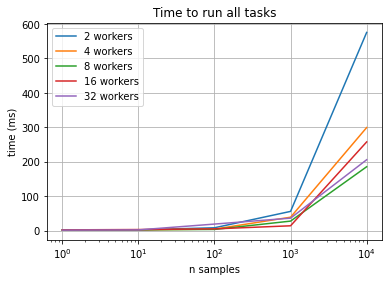

In [4]:
# TOTAL WF TIME
# OVERHEAD TYPE 2
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        if f"c{con}_" in name and "start verify" in name:
            if "ERROR" in str(val):
                print("ERROR")
                break
            start_verify = val
        if f"c{con}_" in name and "start run-workers" in name:
            start_run_workers = val
            all_task_times.append((start_verify - start_run_workers))
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue
        
plt.xscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (ms)',
               title='Time to run all tasks')
ax.grid()

#fig.savefig(f"figs/all_task_time__{data_id}.png")
plt.show()

skipped concurrency 64


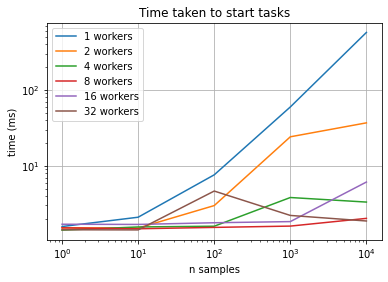

In [6]:
# TIME TO START WORKING ON TASKS
# OVERHEAD TYPE 4
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        if f"c{con}_" in name and "start run-workers" in name:
            start_run_workers = val
        if f"c{con}_" in name and "start samp1" in name:
            if "ERROR" in str(val):
                print("ERROR")
                break
            start_samp1 = val
            all_task_times.append((start_samp1 - start_run_workers))
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue
        
plt.xscale("log")
plt.yscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (ms)',
               title='Time taken to start tasks')
ax.grid()

#fig.savefig(f"figs/task_start_time__{data_id}.png")
plt.show()

skipped concurrency 64


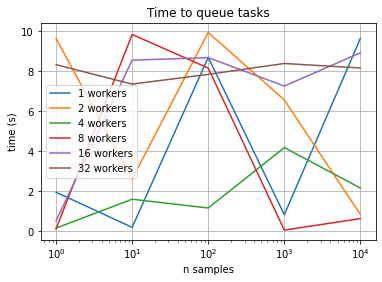

In [14]:
# TIME TO QUEUE ALL TASKS
# OVERHEAD TYPE 3
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    all_task_times = []
    for name, val in data.items():
        #print(name)
        if f"c{con}_" in name and "merlin run" in name:
            queue_tasks = val
            all_task_times.append(queue_tasks)
        
    try:
        ax.plot(samples, all_task_times, label=f"{con} workers")
    except ValueError as e:
        print(f"skipped concurrency {con}")
        continue

plt.xscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='time (s)',
               title='Time to queue tasks')
ax.grid()

#fig.savefig(f"figs/task_queue_time__{data_id}.png")
plt.show()

0.5772865992039442
1.7883853875100613
11.993466643616557
101.63986115343869
578.1161273643374
0.5526162162423134
1.6734628397971392
13.027038488537073
101.33607806265354
1033.4852876961231
0.4888551514595747
1.7400260549038649
10.759311221539974
134.3985463026911
1053.1373343840241
0.6656983103603125
2.0875613018870354
11.377428732812405
187.8809079155326
1260.7145752888173
1.202858131378889
2.483272671699524
17.29531415179372
167.65718467906117
3573.959489405155
0.5240882840007544
1.5329585280269384
68.7420646417886
647.3566522542387
5402.846488671377
0.48245888017117977
1.3186272792518139
0
262.08447577804327
3489.2589926403016


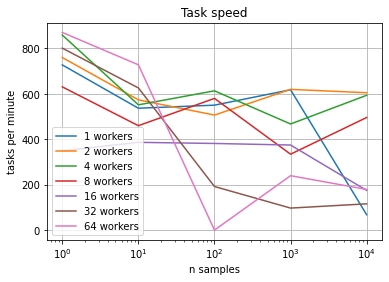

In [11]:
# TASK SPEED
# OVERHEAD TYPE 1
    
concurrencies = [1,2,4,8,16,32,64]
samples = [1,10,100,1000,10000]
fig, ax = plt.subplots()

for con in concurrencies:
    t_per_m = []
    for name, times in data.items():
        if f"c{con}_" in name and " " not in name:
            n_tasks = len(times)
            seconds = sum(times)
            print(seconds)
            mins = seconds / 60.0
            if mins == 0:
                t_per_m.append(0)
                continue
            tasks_per_min = n_tasks / mins
            t_per_m.append(tasks_per_min)
    ax.plot(samples, t_per_m, label=f"{con} workers")

plt.xscale("log")
ax.legend()

ax.set(xlabel='n samples', ylabel='tasks per minute',
               title='Task speed')
ax.grid()

#fig.savefig(f"figs/task_speed__{data_id}.png")
plt.show()

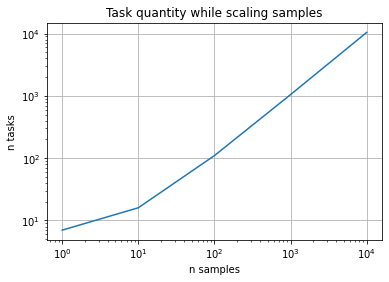

In [12]:
concurrency = 16

n_tasks = []
for sam in samples:
    for name, times in data.items():
        if name.endswith(f"_s{sam}") and name.startswith(f"c16_"):
            n_tasks.append(len(times))
            
fig, ax = plt.subplots()
ax.plot(samples, n_tasks)
plt.xscale("log")
plt.yscale("log")
ax.set(xlabel='n samples', ylabel='n tasks',
       title='Task quantity while scaling samples')
ax.grid()

#fig.savefig(f"figs/n_tasks3__{data_id}.png")
plt.show()

WITH OUTLIERS
71440 task times
17.30135107971728: max task time
0.2539779504634907: mean task time
1.3453813575494276: standard deviation

WITHOUT OUTLIERS
7508 task times
63932 task times
0.05113763175904751: max task time
0.034028219495810995: mean task time
0.004862629993697546: standard deviation


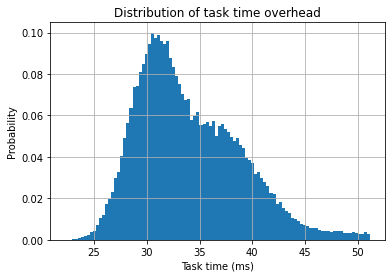

In [13]:
# OVERHEAD TYPE 1
# combining data from all concurrencies and sample quantities

def is_outlier(points, thresh=3):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

x = []
fig, ax = plt.subplots()

for name, times in data.items():
    if " " not in name:
        x += times

x = np.array(x)
#mad = stats.median_absolute_deviation(x)
outlier_mask = is_outlier(x)

print("WITH OUTLIERS")
print(f"{len(x)} task times")
print(f"{max(x)}: max task time")
print(f"{np.mean(x)}: mean task time")
print(f"{np.std(x)}: standard deviation")
outliers = x[outlier_mask]
non_outliers = x[~outlier_mask]
print("\nWITHOUT OUTLIERS")
print(f"{len(outliers)} task times")
print(f"{len(non_outliers)} task times")
print(f"{max(non_outliers)}: max task time")
print(f"{np.mean(non_outliers)}: mean task time")
print(f"{np.std(non_outliers)}: standard deviation")

n_bins = 100

ax.grid()
plt.hist(non_outliers*1000, bins=n_bins, density=True)
plt.xlabel('Task time (ms)')
plt.ylabel('Probability')
ax.set(title='Distribution of task time overhead')
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#plt.savefig(f"figs/histogram__{data_id}.png")

plt.show()